In [1]:
#importing libaries
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#making a list of missing value types
missing_values=["na", "n/a", "__", "?"]

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv', na_values=missing_values)

C:\Users\ElBlack\AppData\Local\Temp\ipykernel_15296\4034011609.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv', na_values=missing_values)


In [4]:
# first five rows 
df.head(5)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [5]:
#Data Types of each column
df.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [6]:
#Column headers
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [7]:
#Subset of columns that I would like to keep
df2=df[['encounter_id', 'patient_nbr','race', 'gender', 'age','time_in_hospital','number_diagnoses', 'max_glu_serum', 'A1Cresult']]

In [8]:
#first ten rows of data for DF2
df2.head(10)

,encounter_id,patient_nbr,race,gender,age,time_in_hospital,number_diagnoses,max_glu_serum,A1Cresult
0,2278392,8222157,Caucasian,Female,[0-10),1,1,NaN,NaN
1,149190,55629189,Caucasian,Female,[10-20),3,9,NaN,NaN
2,64410,86047875,AfricanAmerican,Female,[20-30),2,6,NaN,NaN
3,500364,82442376,Caucasian,Male,[30-40),2,7,NaN,NaN
4,16680,42519267,Caucasian,Male,[40-50),1,5,NaN,NaN
5,35754,82637451,Caucasian,Male,[50-60),3,9,NaN,NaN
6,55842,84259809,Caucasian,Male,[60-70),4,7,NaN,NaN
7,63768,114882984,Caucasian,Male,[70-80),5,8,NaN,NaN
8,12522,48330783,Caucasian,Female,[80-90),13,8,NaN,NaN
9,15738,63555939,Caucasian,Female,[90-100),12,8,NaN,NaN


C:\Users\ElBlack\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


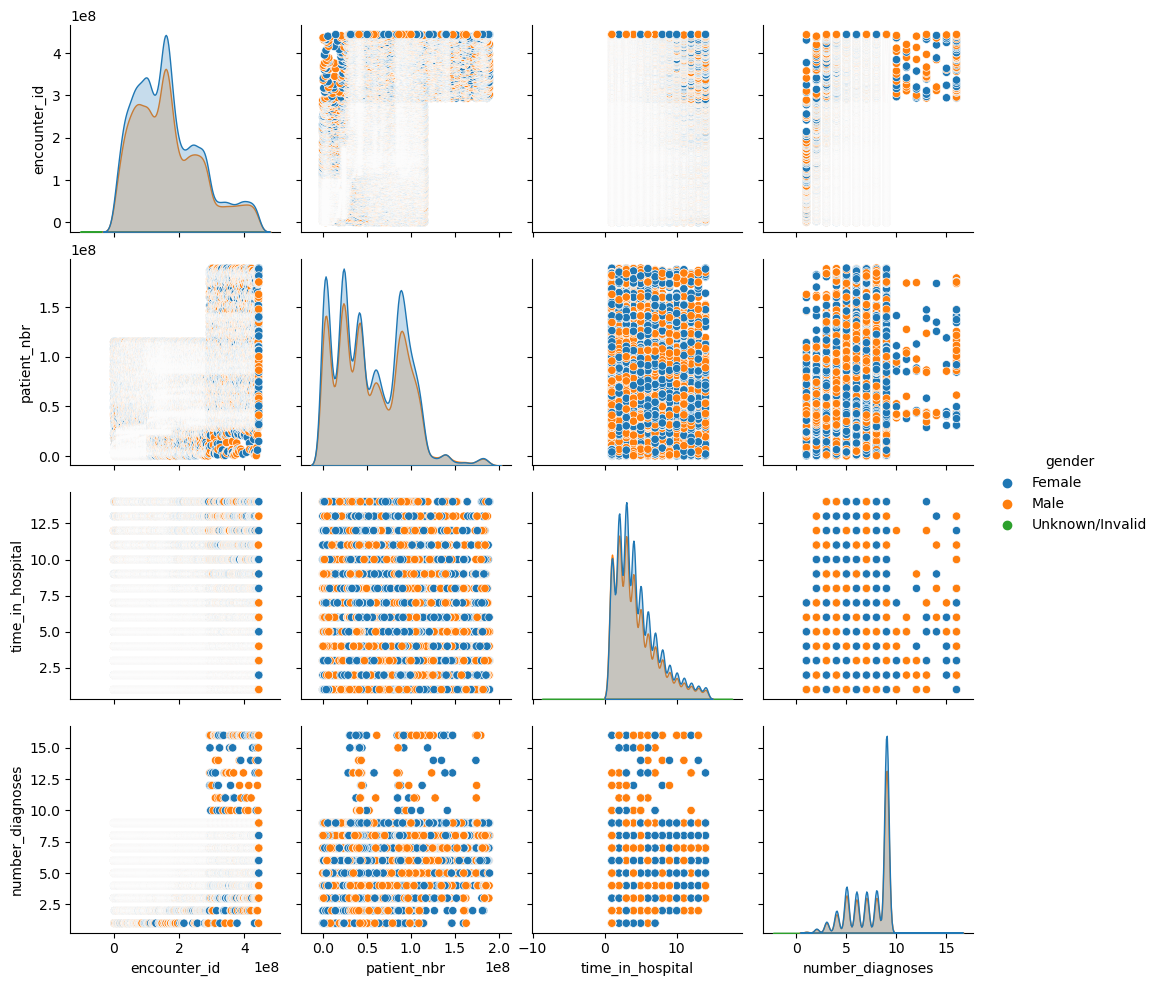

In [9]:
#Pairplot for Gender
sns.pairplot(df2, hue='gender')

In [10]:
# Female patients were the highest number of patients. 
# To seperate out female patients. 
df3=df2.loc[df2['gender'] == 'Female']

In [11]:
#first five rows of data for DF3
df3.head()

,encounter_id,patient_nbr,race,gender,age,time_in_hospital,number_diagnoses,max_glu_serum,A1Cresult
0,2278392,8222157,Caucasian,Female,[0-10),1,1,NaN,NaN
1,149190,55629189,Caucasian,Female,[10-20),3,9,NaN,NaN
2,64410,86047875,AfricanAmerican,Female,[20-30),2,6,NaN,NaN
8,12522,48330783,Caucasian,Female,[80-90),13,8,NaN,NaN
9,15738,63555939,Caucasian,Female,[90-100),12,8,NaN,NaN


C:\Users\ElBlack\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


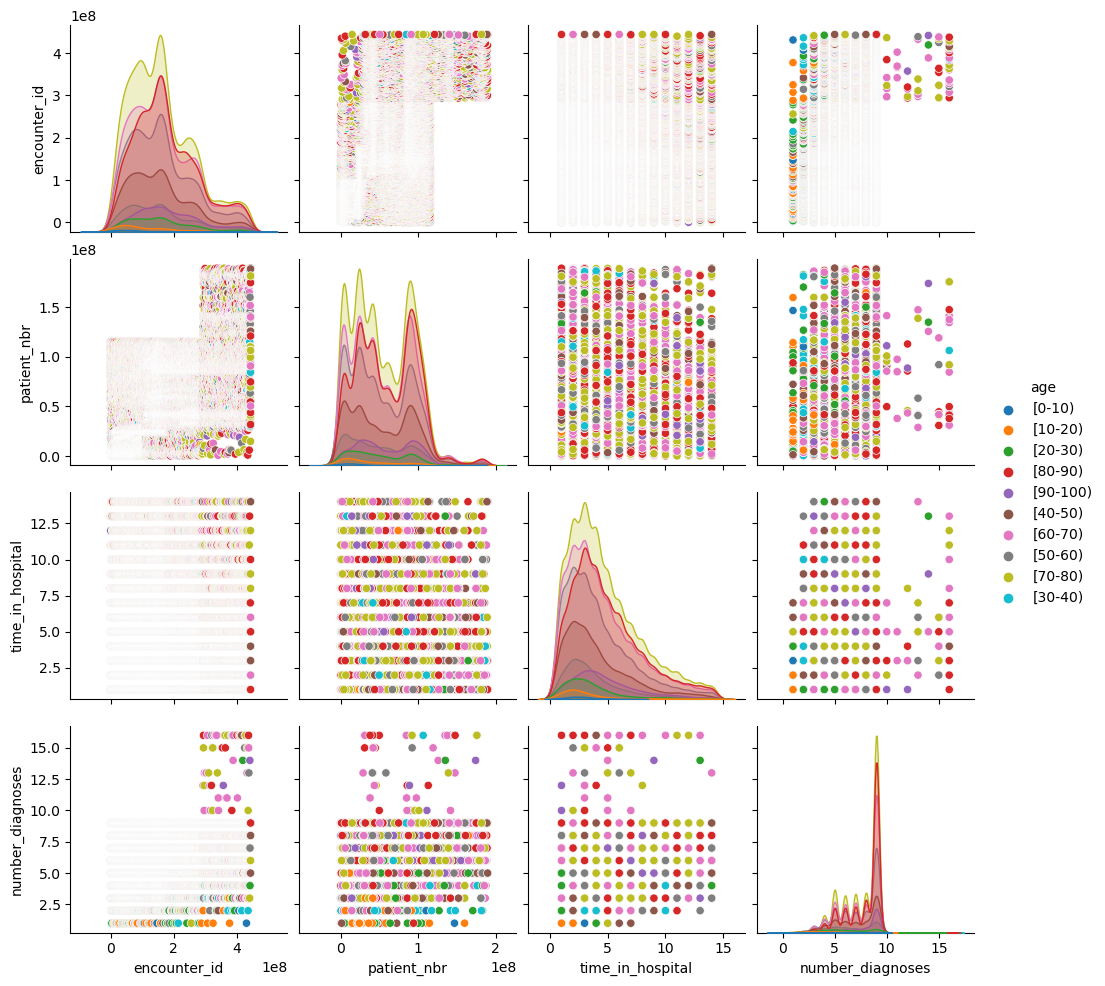

In [12]:
#Pairplot for Gender
sns.pairplot(df3, hue='age')

In [13]:
# Highest number of patients with an age range of 70-80 
# To seperate out female patients within the age range of 70-80 
df4=df3.loc[df3['age'] == '[70-80)']

In [14]:
#first five rows of data for DF4
df4.head()

,encounter_id,patient_nbr,race,gender,age,time_in_hospital,number_diagnoses,max_glu_serum,A1Cresult
22,182796,63000108,AfricanAmerican,Female,[70-80),2,8,NaN,NaN
24,216156,62718876,AfricanAmerican,Female,[70-80),3,6,NaN,NaN
32,260166,80845353,Caucasian,Female,[70-80),6,8,NaN,NaN
34,293118,3327282,Caucasian,Female,[70-80),5,9,NaN,NaN
36,325866,98427861,Caucasian,Female,[70-80),3,5,NaN,NaN


In [15]:
#Showing Felmale patients in the age range of 70-80 with 5 or more diagnoses.
# To seperate out female patients within the age range of 70-80 with 5 or more diagnoses
df5=df4.loc[df4['number_diagnoses'] >= 5]

In [16]:
#first five rows of data for DF5
df5.head()

,encounter_id,patient_nbr,race,gender,age,time_in_hospital,number_diagnoses,max_glu_serum,A1Cresult
22,182796,63000108,AfricanAmerican,Female,[70-80),2,8,NaN,NaN
24,216156,62718876,AfricanAmerican,Female,[70-80),3,6,NaN,NaN
32,260166,80845353,Caucasian,Female,[70-80),6,8,NaN,NaN
34,293118,3327282,Caucasian,Female,[70-80),5,9,NaN,NaN
36,325866,98427861,Caucasian,Female,[70-80),3,5,NaN,NaN


In [17]:
#Pairing down columns even more. 
df6=df5[['patient_nbr','race', 'gender', 'age', 'time_in_hospital','number_diagnoses']]

In [18]:
#first 10 rows of data for DF6
df6.head()

,patient_nbr,race,gender,age,time_in_hospital,number_diagnoses
22,63000108,AfricanAmerican,Female,[70-80),2,8
24,62718876,AfricanAmerican,Female,[70-80),3,6
32,80845353,Caucasian,Female,[70-80),6,8
34,3327282,Caucasian,Female,[70-80),5,9
36,98427861,Caucasian,Female,[70-80),3,5


C:\Users\ElBlack\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


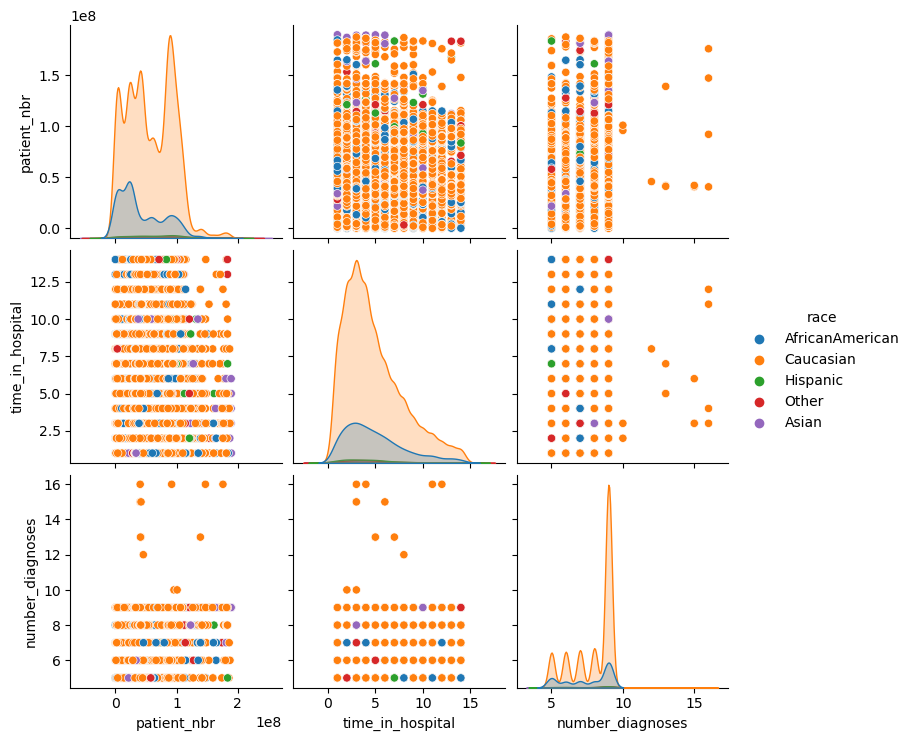

In [19]:
#Pairplot for Race of female patients. 
sns.pairplot(df6, hue='race')

In [20]:
df6['race'].value_counts().sort_values(ascending=False)

race
Caucasian          10108
AfricanAmerican     2253
Hispanic             190
Other                160
Asian                 78
Name: count, dtype: int64

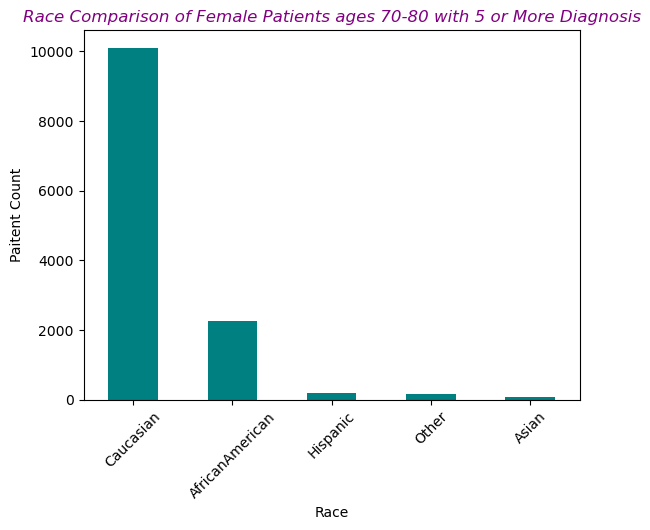

In [21]:
df6['race'].value_counts() \
.head(10) \
.plot(kind='bar', xlabel = 'Race', rot=45,
      ylabel = 'Paitent Count', color = 'teal')
plt.title('Race Comparison of Female Patients ages 70-80 with 5 or More Diagnosis' \
          , loc='center', color='purple', style='italic')
plt.show()

In [24]:
#Showing Felmale patients in the age range of 70-80 with 5 or more diagnoses.
# To seperate out female patients within the age range of 70-80 with 5 or more diagnoses
df7=df6.loc[df6['number_diagnoses'] <= 5]

In [26]:
df7.head()

,patient_nbr,race,gender,age,time_in_hospital,number_diagnoses
36,98427861,Caucasian,Female,[70-80),3,5
90,20830941,Caucasian,Female,[70-80),5,5
135,53848278,AfricanAmerican,Female,[70-80),13,5
223,105589584,Hispanic,Female,[70-80),6,5
301,63285453,Caucasian,Female,[70-80),8,5


In [27]:
df7['race'].value_counts().sort_values(ascending=False)

race
Caucasian          1008
AfricanAmerican     407
Hispanic             26
Other                16
Asian                 6
Name: count, dtype: int64

# Conclusion
Caucasian female paitents with the age range of 70-80 had the highest population. 
This is also considering that this group had the highest number of patients regardless of number of diagnoses. 
This group is followed by the African American population. 